In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Load dataset
data = pd.read_csv("StudentsPerformance.csv")
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
# X = all columns except last
x = data.iloc[:, 0:-1]

# Y = last column (target)
y = data.iloc[:, -1]

print(x.shape)
print(y.shape)


(1000, 7)
(1000,)


In [3]:
cat_columns = x.select_dtypes(['object']).columns
x[cat_columns] = x[cat_columns].apply(lambda col: pd.factorize(col)[0])


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.3, shuffle=False
)


In [5]:
BernNB = BernoulliNB()
BernNB.fit(X_train, Y_train)
Y_bpred = BernNB.predict(X_test)

b_accuracy = accuracy_score(Y_test, Y_bpred)
b_precision = metrics.precision_score(Y_test, Y_bpred, average='weighted', labels=np.unique(Y_bpred))
b_recall = metrics.recall_score(Y_test, Y_bpred, average='weighted', labels=np.unique(Y_bpred))
b_f1 = metrics.f1_score(Y_test, Y_bpred, average='weighted', labels=np.unique(Y_bpred))

print("Bernoulli NB Results:")
print(b_accuracy, b_precision, b_recall, b_f1)


Bernoulli NB Results:
0.03333333333333333 0.03794677975887634 0.11235955056179775 0.048722102148504226


In [6]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
Y_rpred = RF.predict(X_test)

r_accuracy = accuracy_score(Y_test, Y_rpred)
r_precision = metrics.precision_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))
r_recall = metrics.recall_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))
r_f1 = metrics.f1_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))

print("Random Forest Results:")
print(r_accuracy, r_precision, r_recall, r_f1)


Random Forest Results:
0.07 0.05971782762691854 0.07636363636363637 0.06371598221254972


c:\Users\gh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
GausNB = GaussianNB()
GausNB.fit(X_train, Y_train)
Y_gpred = GausNB.predict(X_test)

g_accuracy = accuracy_score(Y_test, Y_gpred)
g_precision = metrics.precision_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))
g_recall = metrics.recall_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))
g_f1 = metrics.f1_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))

print("Gaussian NB Results:")
print(g_accuracy, g_precision, g_recall, g_f1)


Gaussian NB Results:
0.06333333333333334 0.1301564769958269 0.11728395061728394 0.08305616768149068


c:\Users\gh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, Y_train)
Y_dpred = Dtree.predict(X_test)

d_accuracy = accuracy_score(Y_test, Y_dpred)
d_precision = metrics.precision_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))
d_recall = metrics.recall_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))
d_f1 = metrics.f1_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))

print("Decision Tree Results:")
print(d_accuracy, d_precision, d_recall, d_f1)


Decision Tree Results:
0.09333333333333334 0.11648535273070589 0.10408921933085502 0.10366369157701577


c:\Users\gh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, Y_train)
Y_mpred = MultiNB.predict(X_test)

m_accuracy = accuracy_score(Y_test, Y_mpred)
m_precision = metrics.precision_score(Y_test, Y_mpred, average='weighted', labels=np.unique(Y_mpred))
m_recall = metrics.recall_score(Y_test, Y_mpred, average='weighted', labels=np.unique(Y_mpred))
m_f1 = metrics.f1_score(Y_test, Y_mpred, average='weighted', labels=np.unique(Y_mpred))

print("Multinomial NB Results:")
print(m_accuracy, m_precision, m_recall, m_f1)


Multinomial NB Results:
0.04 0.04783717097588459 0.08633093525179857 0.0514340509403769


c:\Users\gh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
Y_kpred = KNN.predict(X_test)

k_accuracy = accuracy_score(Y_test, Y_kpred)
k_precision = metrics.precision_score(Y_test, Y_kpred, average='weighted', labels=np.unique(Y_kpred))
k_recall = metrics.recall_score(Y_test, Y_kpred, average='weighted', labels=np.unique(Y_kpred))
k_f1 = metrics.f1_score(Y_test, Y_kpred, average='weighted', labels=np.unique(Y_kpred))

print("KNN Results:")
print(k_accuracy, k_precision, k_recall, k_f1)


KNN Results:
0.08333333333333333 0.10202544929817657 0.09090909090909091 0.08688034979687104


c:\Users\gh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


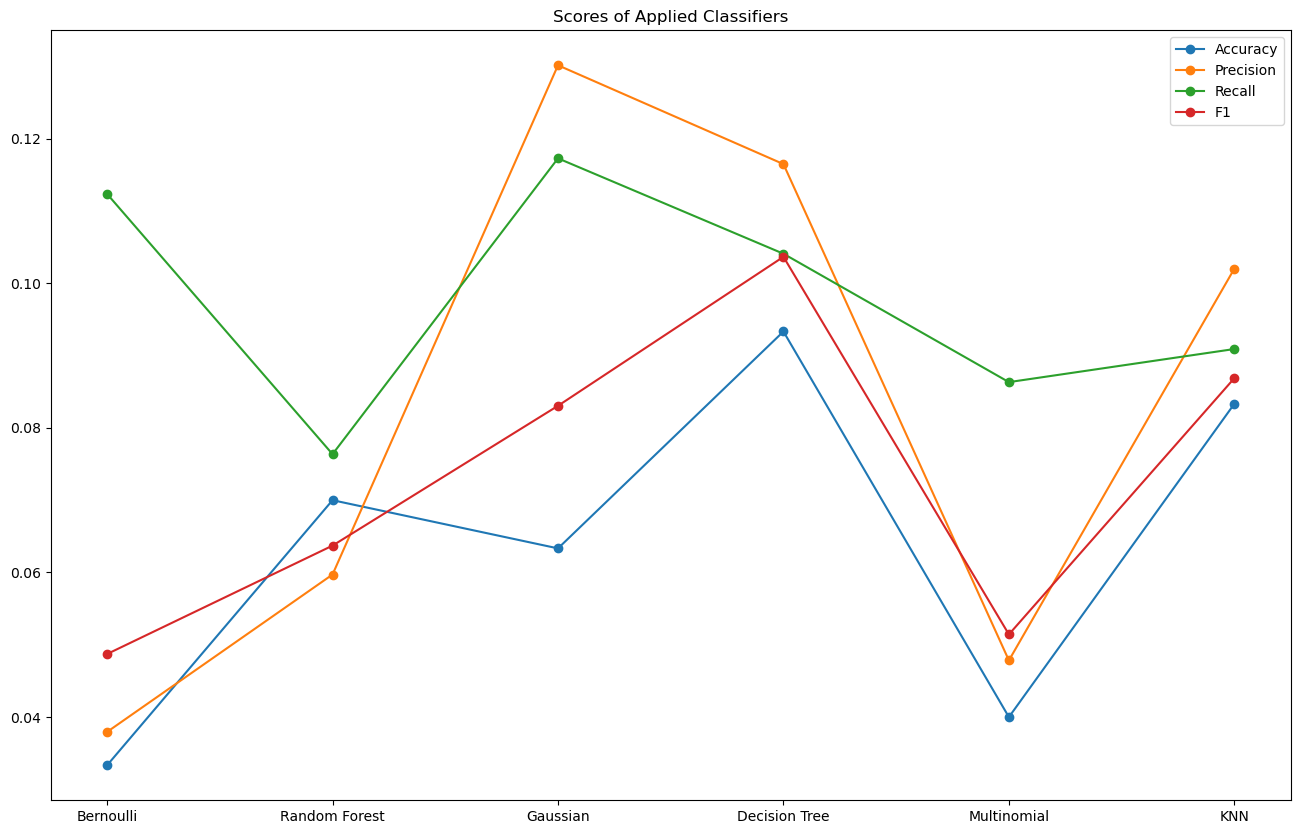

In [11]:
plt.figure(figsize=(16,10))

names = ['Bernoulli','Random Forest','Gaussian','Decision Tree','Multinomial','KNN']

plt.plot(names, [b_accuracy,r_accuracy,g_accuracy,d_accuracy,m_accuracy,k_accuracy], marker='o', label='Accuracy')
plt.plot(names, [b_precision,r_precision,g_precision,d_precision,m_precision,k_precision], marker='o', label='Precision')
plt.plot(names, [b_recall,r_recall,g_recall,d_recall,m_recall,k_recall], marker='o', label='Recall')
plt.plot(names, [b_f1,r_f1,g_f1,d_f1,m_f1,k_f1], marker='o', label='F1')

plt.title("Scores of Applied Classifiers")
plt.legend()
plt.show()


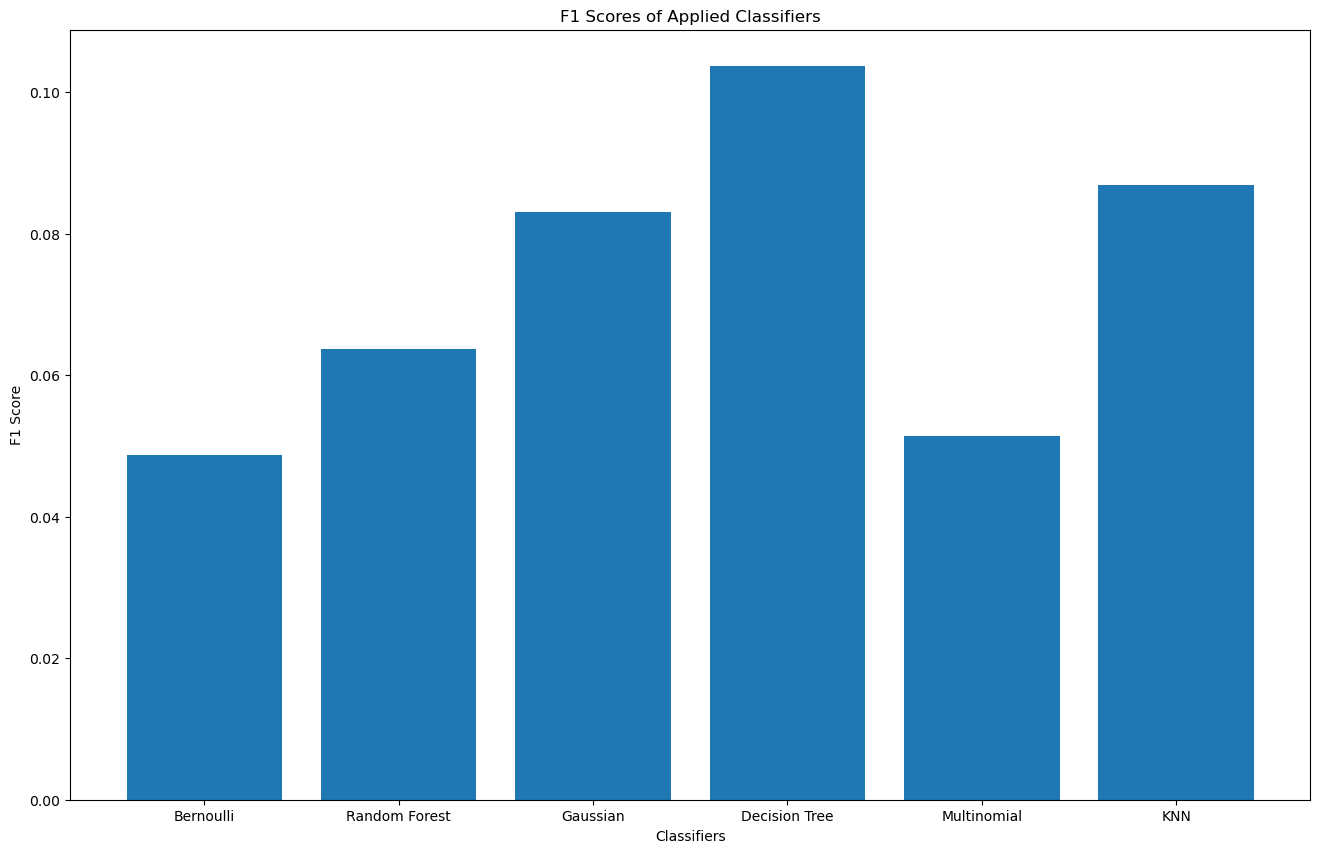

In [12]:
plt.figure(figsize=(16,10))
plt.bar(names, [b_f1,r_f1,g_f1,d_f1,m_f1,k_f1])
plt.xlabel("Classifiers")
plt.ylabel("F1 Score")
plt.title("F1 Scores of Applied Classifiers")
plt.show()


In [13]:
F1_scores = {
    "Bernoulli": b_f1,
    "Random Forest": r_f1,
    "Gaussian": g_f1,
    "Decision Tree": d_f1,
    "Multinomial": m_f1,
    "KNN": k_f1
}

best_model_name = max(F1_scores, key=F1_scores.get)
print("\nBest Model =", best_model_name)

# Final Prediction
if best_model_name == "Bernoulli":
    final_pred = Y_bpred
elif best_model_name == "Random Forest":
    final_pred = Y_rpred
elif best_model_name == "Gaussian":
    final_pred = Y_gpred
elif best_model_name == "Decision Tree":
    final_pred = Y_dpred
elif best_model_name == "Multinomial":
    final_pred = Y_mpred
else:
    final_pred = Y_kpred

print("Lab 11 Final Accuracy =", accuracy_score(Y_test, final_pred))



Best Model = Decision Tree
Lab 11 Final Accuracy = 0.09333333333333334
